<a href="https://colab.research.google.com/github/fajni/ELFAK-TiMAP/blob/main/Stabla%20Odlucivanja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stabla odlucivanja

Stabla odlucivanja (_eng. Decision Tree Classifier_)

Primena stabla odlučivanja za predviđanje gubitka zaposlenih (_Employee Attrition_)

__ZADATAK__

Koriscenjem biblioteka otvorenog koda modelovati stablo odlucivanja.
Koriscenjem unakrsne validacije i automatske optimizacije parametara podesiti model tako da ima sto bolje performanse.

Izvrsiti evaluaciju performansi dobijenog stabla odlucivanja.



---



In [105]:
import matplotlib.pyplot as plot
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import seaborn as sns
# Iscrtavanje matice konfuzije korišćenjem seaborn biblioteke.
from sklearn.metrics import confusion_matrix

from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

## Podaci

Opis podataka:

- _Employee Attrition_ refers to the natural reduction of a workforce due to employees leaving the company and not being immediately replaced.

<br/>

__Education__
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

__EnvironmentSatisfaction__
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__JobInvolvement__
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__JobSatisfaction__
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__PerformanceRating__
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

__RelationshipSatisfaction__
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

__WorkLifeBalance__
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [106]:
try:
  !wget https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Employee_Attrition/employee-attrition.csv -O employee-attrition.csv
except:
  print("An exception occurred")

data = pd.read_csv("employee-attrition.csv").head(500)

data

--2025-07-01 19:24:44--  https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Employee_Attrition/employee-attrition.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226506 (221K) [text/plain]
Saving to: ‘employee-attrition.csv’

employee-attrition. 100%[===================>] 221.20K  --.-KB/s    in 0.03s   

2025-07-01 19:24:45 (7.89 MB/s) - ‘employee-attrition.csv’ saved [226506/226506]



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27,Yes,Travel_Rarely,1420,Sales,2,1,Marketing,1,667,...,2,80,1,5,3,3,4,3,0,2
496,21,No,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,...,3,80,0,3,2,3,3,2,1,2
497,44,No,Travel_Rarely,1315,Research & Development,3,4,Other,1,671,...,1,80,1,26,2,4,2,2,0,1
498,22,No,Travel_Rarely,604,Research & Development,6,1,Medical,1,675,...,4,80,0,3,3,3,2,2,2,2


In [107]:
print(data.describe())

              Age   DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  500.000000   500.00000        500.000000  500.000000          500.0   
mean    36.896000   838.87400          9.120000    2.888000            1.0   
std      9.359722   408.79204          8.255538    1.036148            0.0   
min     18.000000   103.00000          1.000000    1.000000            1.0   
25%     30.000000   508.75000          2.000000    2.000000            1.0   
50%     36.000000   843.00000          6.000000    3.000000            1.0   
75%     43.000000  1217.25000         14.000000    4.000000            1.0   
max     60.000000  1499.00000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      500.000000               500.000000  500.000000      500.000000   
mean       336.904000                 2.678000   65.742000        2.730000   
std        194.474315                 1.071734   20.604284     

In [108]:
print(list(enumerate(data.columns)))

[(0, 'Age'), (1, 'Attrition'), (2, 'BusinessTravel'), (3, 'DailyRate'), (4, 'Department'), (5, 'DistanceFromHome'), (6, 'Education'), (7, 'EducationField'), (8, 'EmployeeCount'), (9, 'EmployeeNumber'), (10, 'EnvironmentSatisfaction'), (11, 'Gender'), (12, 'HourlyRate'), (13, 'JobInvolvement'), (14, 'JobLevel'), (15, 'JobRole'), (16, 'JobSatisfaction'), (17, 'MaritalStatus'), (18, 'MonthlyIncome'), (19, 'MonthlyRate'), (20, 'NumCompaniesWorked'), (21, 'Over18'), (22, 'OverTime'), (23, 'PercentSalaryHike'), (24, 'PerformanceRating'), (25, 'RelationshipSatisfaction'), (26, 'StandardHours'), (27, 'StockOptionLevel'), (28, 'TotalWorkingYears'), (29, 'TrainingTimesLastYear'), (30, 'WorkLifeBalance'), (31, 'YearsAtCompany'), (32, 'YearsInCurrentRole'), (33, 'YearsSinceLastPromotion'), (34, 'YearsWithCurrManager')]




---



### Obrada podataka

Nedostajuce vrednosti:

In [109]:
# Provera nedostajućih vrednosti.
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Izdvajanje potrebnih podataka iz skupa:

In [110]:
data = data.drop(data.columns[[4, 7, 11, 15]], axis=1)

data

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,1,1,2,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,1,1,2,3,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,2,1,4,4,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,1,5,4,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,1,7,1,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27,Yes,Travel_Rarely,1420,2,1,1,667,3,85,...,2,80,1,5,3,3,4,3,0,2
496,21,No,Travel_Rarely,1343,22,1,1,669,3,49,...,3,80,0,3,2,3,3,2,1,2
497,44,No,Travel_Rarely,1315,3,4,1,671,4,35,...,1,80,1,26,2,4,2,2,0,1
498,22,No,Travel_Rarely,604,6,1,1,675,1,69,...,4,80,0,3,3,3,2,2,2,2


Prevodjenje kategorickih atributa u numericke (0 ili 1) atribute:

In [111]:
# Label Encoding
le = preprocessing.LabelEncoder()

data.Attrition = le.fit_transform(data.Attrition)
data.BusinessTravel = le.fit_transform(data.BusinessTravel)
data.MaritalStatus = le.fit_transform(data.MaritalStatus)
data.Over18 = le.fit_transform(data.Over18)
data.OverTime = le.fit_transform(data.OverTime)

data

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,2,1,1,2,94,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,8,1,1,2,3,61,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,1,4,4,92,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,3,4,1,5,4,56,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,2,1,1,7,1,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27,1,2,1420,2,1,1,667,3,85,...,2,80,1,5,3,3,4,3,0,2
496,21,0,2,1343,22,1,1,669,3,49,...,3,80,0,3,2,3,3,2,1,2
497,44,0,2,1315,3,4,1,671,4,35,...,1,80,1,26,2,4,2,2,0,1
498,22,0,2,604,6,1,1,675,1,69,...,4,80,0,3,3,3,2,2,2,2


In [112]:
print(list(enumerate(data.columns)))

[(0, 'Age'), (1, 'Attrition'), (2, 'BusinessTravel'), (3, 'DailyRate'), (4, 'DistanceFromHome'), (5, 'Education'), (6, 'EmployeeCount'), (7, 'EmployeeNumber'), (8, 'EnvironmentSatisfaction'), (9, 'HourlyRate'), (10, 'JobInvolvement'), (11, 'JobLevel'), (12, 'JobSatisfaction'), (13, 'MaritalStatus'), (14, 'MonthlyIncome'), (15, 'MonthlyRate'), (16, 'NumCompaniesWorked'), (17, 'Over18'), (18, 'OverTime'), (19, 'PercentSalaryHike'), (20, 'PerformanceRating'), (21, 'RelationshipSatisfaction'), (22, 'StandardHours'), (23, 'StockOptionLevel'), (24, 'TotalWorkingYears'), (25, 'TrainingTimesLastYear'), (26, 'WorkLifeBalance'), (27, 'YearsAtCompany'), (28, 'YearsInCurrentRole'), (29, 'YearsSinceLastPromotion'), (30, 'YearsWithCurrManager')]


Odredjivanje ciljne varijable/kolone (labela):

In [113]:
# Svi atributi se smeštaju u matricu X, osim ciljne kolone (kolona 1, Attrition)
X = data.drop(data.columns[[1]], axis=1).values

print(X)

# Labela klase se smešta u vektor y.
Y=data.iloc[:, 1].values

print(Y)

[[  41    2 1102 ...    4    0    5]
 [  49    1  279 ...    7    1    7]
 [  37    2 1373 ...    0    0    0]
 ...
 [  44    2 1315 ...    2    0    1]
 [  22    2  604 ...    2    2    2]
 [  33    2 1216 ...    0    1    2]]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0



---



## Kreiranje modela

In [114]:
# Kreiranje modela stabla odlučivanja.
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',
                    min_samples_split=2, min_samples_leaf=1, random_state=43)

decision_tree

DecisionTreeClassifier(random_state=43)

Preciznost modela:

In [115]:
# Evaluacija modela postupkom unakrsne validacije. Radi se 5-ostruka unakrsna validacija.
scores = cross_val_score(decision_tree, X, Y, cv=5)

print("Tačnost %0.2f sa standardnom devijacijom %0.2f" % (scores.mean(), scores.std()))

Tačnost 0.67 sa standardnom devijacijom 0.20


Kreiranje skupova podataka za treniranje i testiranje:

In [116]:
# Ručno deljenje skupa podataka na deo za treniranje i deo za testiranje.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1, random_state=43)

decision_tree

DecisionTreeClassifier(random_state=43)

Treniranje i testiranje modela

In [117]:
# Obučavanje modela.
model = decision_tree.fit(X_train, Y_train)

# Testiranje modela.
Y_pred = decision_tree.predict(X_test)

print(f"Tačnost stabla odlučivanja: {metrics.accuracy_score(Y_test, Y_pred)}")

Tačnost stabla odlučivanja: 0.78




---



## Matrica konfuzije

Matrica konfuzije

|      |      |
| ---- | ---- |
|  TP  |  FN  |
|  FP  |  TN  |

TP: Model je pravilno predvideo da je primer pozitivan

TN: Model je pravilno predvideo da je primer negativan

FP: Model je predvideo pozitivno, ali je stvarno negativno (lažno pozitivan)

FN: Model je predvideo negativno, ali je stvarno pozitivno (lažno negativan)

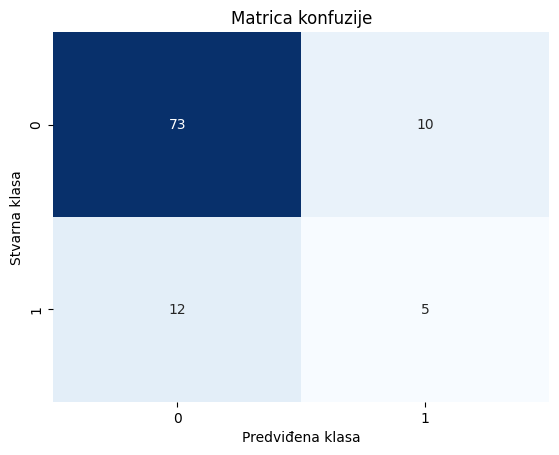

In [118]:
class_names=[0,1]
matrix = confusion_matrix(Y_test, Y_pred)

# Kreiranje DataFrame objekta za prikaz.
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Iscrtavanje heatmap-e.
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plot.title("Matrica konfuzije")
plot.ylabel("Stvarna klasa")
plot.xlabel("Predviđena klasa")
plot.show()

Matrica konfuzije u konzoli:

In [119]:
print(f"Matrica konfuzije: \n {matrix}")

Matrica konfuzije: 
 [[73 10]
 [12  5]]


In [120]:
print(len(Y_test))
print(len(Y_pred))

100
100




---



Izvestaj o performansama klasifikacionog modela

In [121]:
# Korišćenje classification_report za prikaz izvedenih mera:
# preciznost, odziv, F-mera
print(classification_report(Y_test, Y_pred, target_names=['No Attrition (0)', 'Attrition (1)']))

                  precision    recall  f1-score   support

No Attrition (0)       0.86      0.88      0.87        83
   Attrition (1)       0.33      0.29      0.31        17

        accuracy                           0.78       100
       macro avg       0.60      0.59      0.59       100
    weighted avg       0.77      0.78      0.77       100





---



## Stablo odlucivanja

In [122]:
# Stablo odlučivanja gde se kao kriterijum podele koristi entropija.
decision_tree1 = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2, min_samples_leaf=1, random_state=43)

model = decision_tree1.fit(X_train, Y_train)

# Testiranje modela.
y_pred=decision_tree1.predict(X_test)

print(f"Tačnost stabla odlučivanja primenom entropije i bez orezivanja: {metrics.accuracy_score(Y_test, Y_pred)}")

Tačnost stabla odlučivanja primenom entropije i bez orezivanja: 0.78


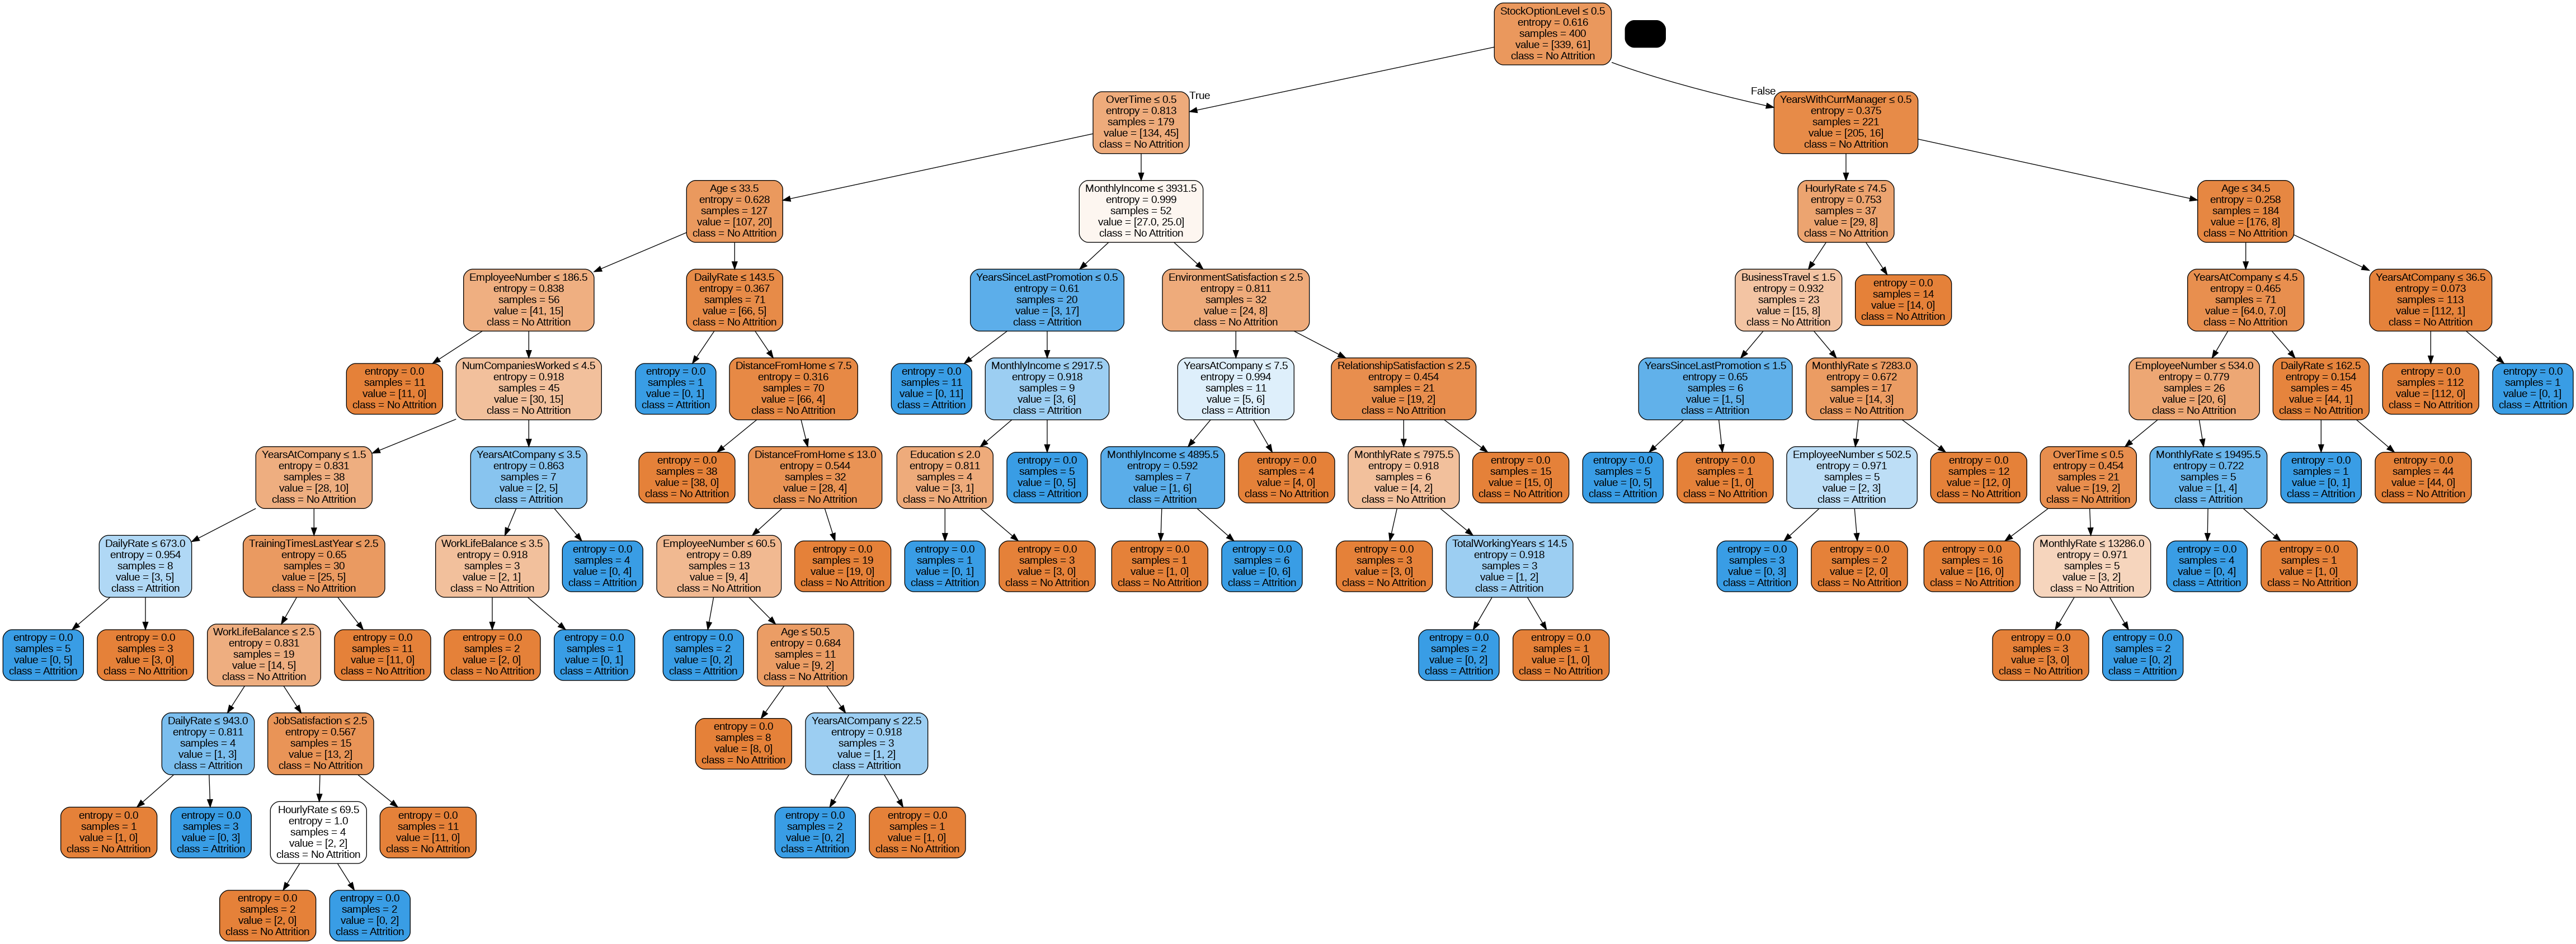

In [123]:
# Prikaz stabla odlučivanja pomoću graphviz biblioteke.
feature_cols = ['Age', 'BusinessTravel', 'DailyRate',
                'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
                'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
                'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
                'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
                'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
                'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                'YearsSinceLastPromotion', 'YearsWithCurrManager']

dot_data = StringIO()

export_graphviz(decision_tree1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['No Attrition', 'Attrition'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('01_gubitak_zaposlenih.png')

Image(graph.create_png())



---



In [124]:
# Stablo odlučivanja gde se kao kriterijum podele koristi entropija i
# sa uključenim orezivanjem. Podstablo sa najvećom kompleksnošću koja je manja
# od ccp_alpha će biti orezano.
decision_tree2 = DecisionTreeClassifier(criterion='entropy', splitter='best',
                    min_samples_split=2, min_samples_leaf=1, random_state=43,
                    ccp_alpha=0.01)

model = decision_tree2.fit(X_train, Y_train)

# Testiranje modela.
y_pred=decision_tree2.predict(X_test)

print(f"Tačnost stabla odlučivanja primenom entropije i sa orezivanjem: {metrics.accuracy_score(Y_test, y_pred)}")

Tačnost stabla odlučivanja primenom entropije i sa orezivanjem: 0.76


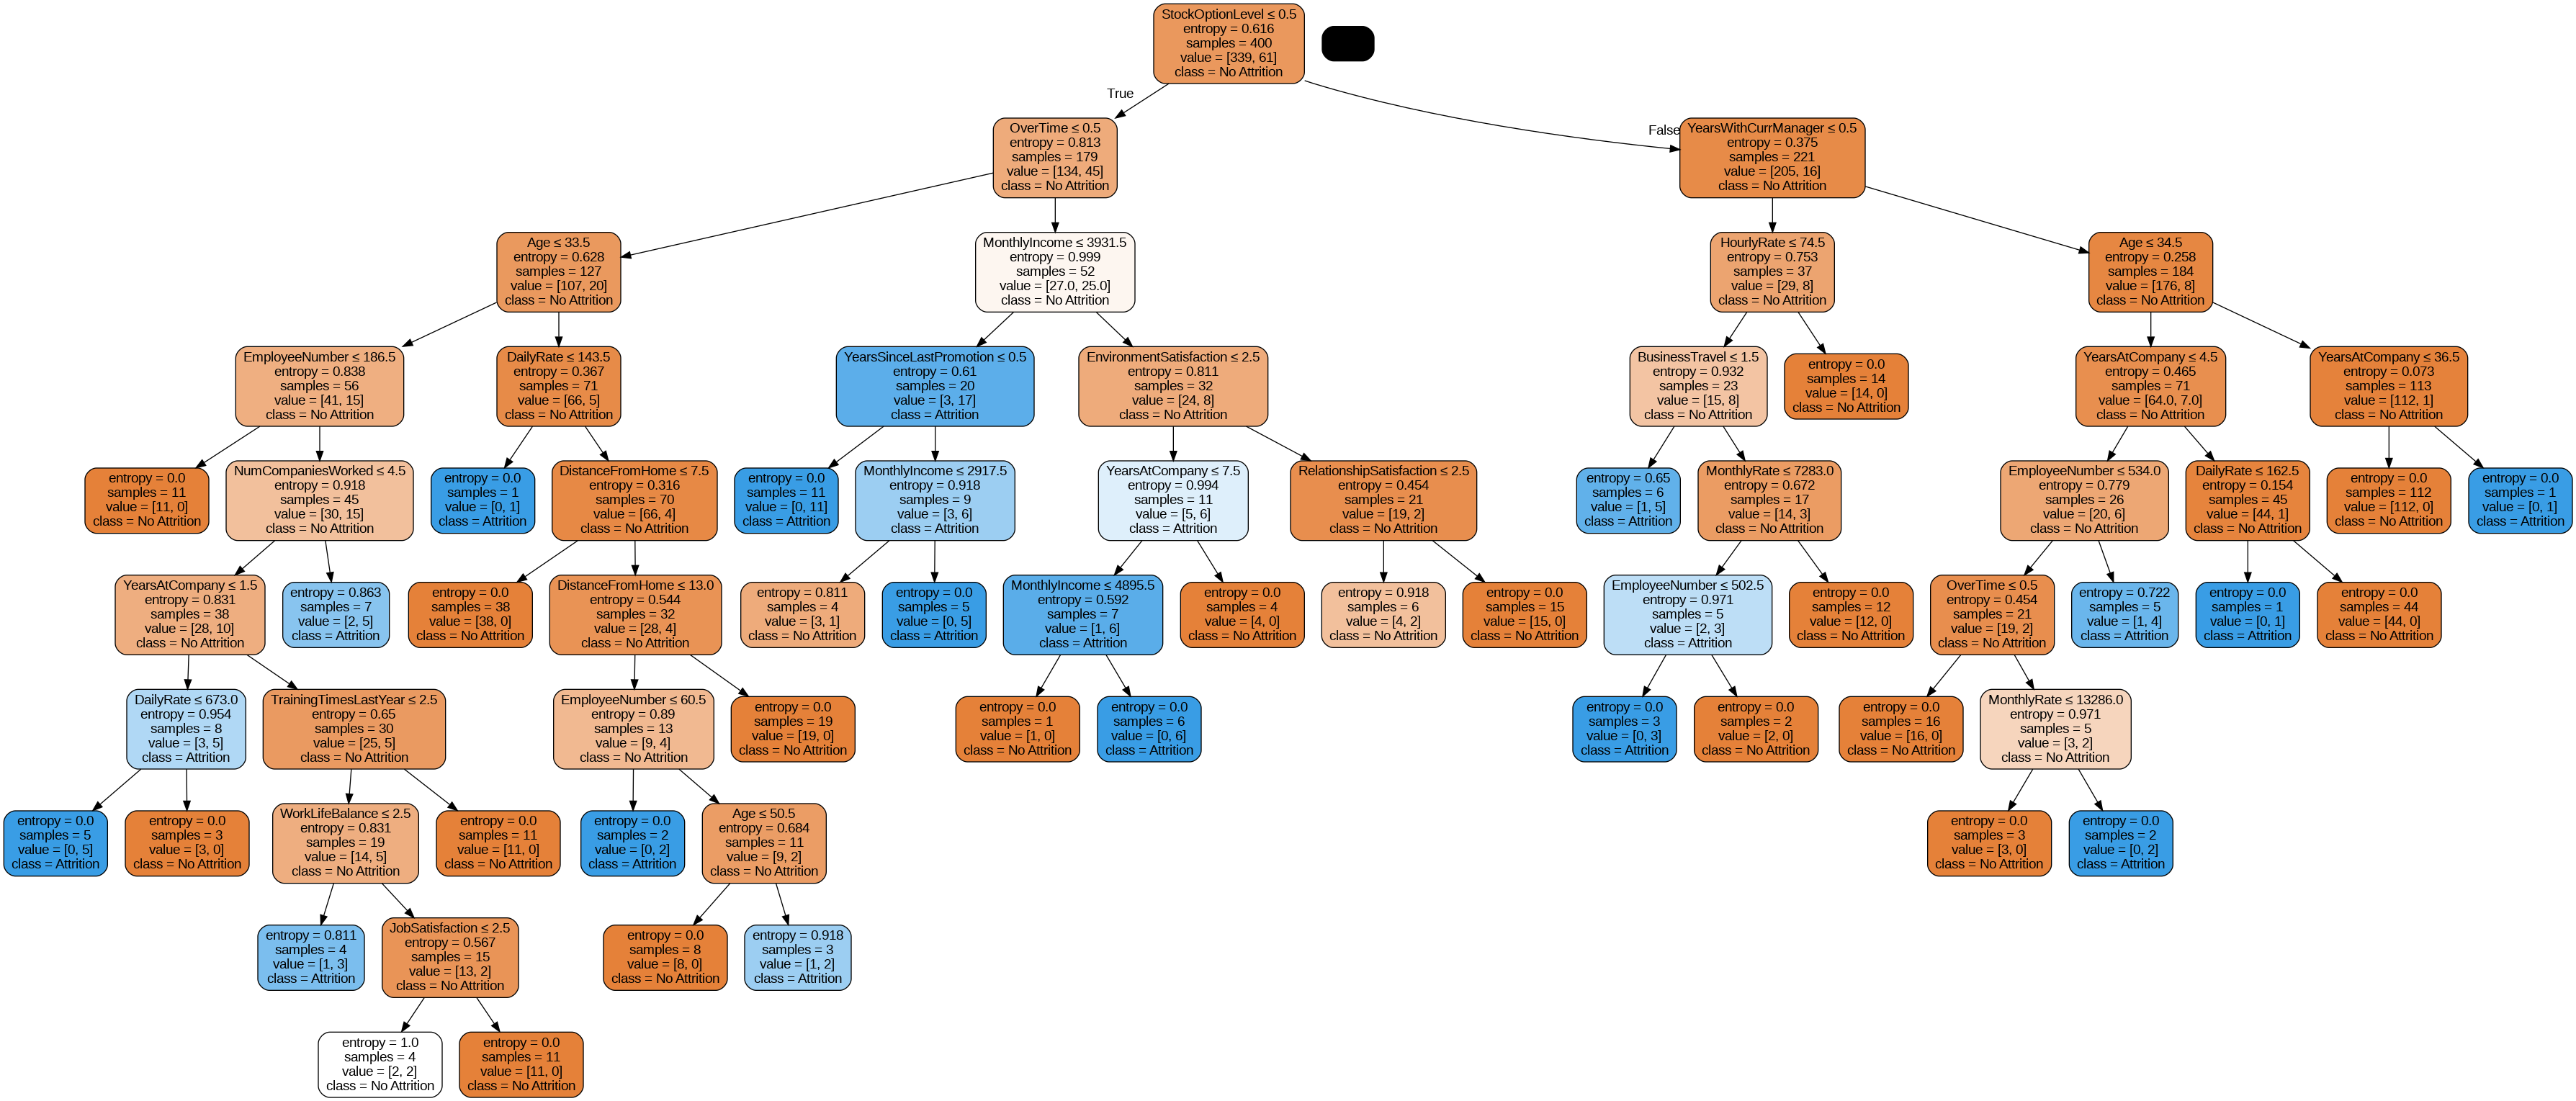

In [125]:
# Prikaz stabla odlučivanja pomoću graphviz biblioteke.
feature_cols = ['Age', 'BusinessTravel', 'DailyRate',
                'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
                'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
                'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
                'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
                'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
                'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                'YearsSinceLastPromotion', 'YearsWithCurrManager']

dot_data = StringIO()

export_graphviz(decision_tree2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['No Attrition', 'Attrition'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('02_gubitak_zaposlenih.png')

Image(graph.create_png())